<a href="https://colab.research.google.com/github/Bouchrikator/sic-/blob/main/CHeckpoint0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
import seaborn as sns 


In [7]:
df=pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


1    165
0    138
Name: target, dtype: int64

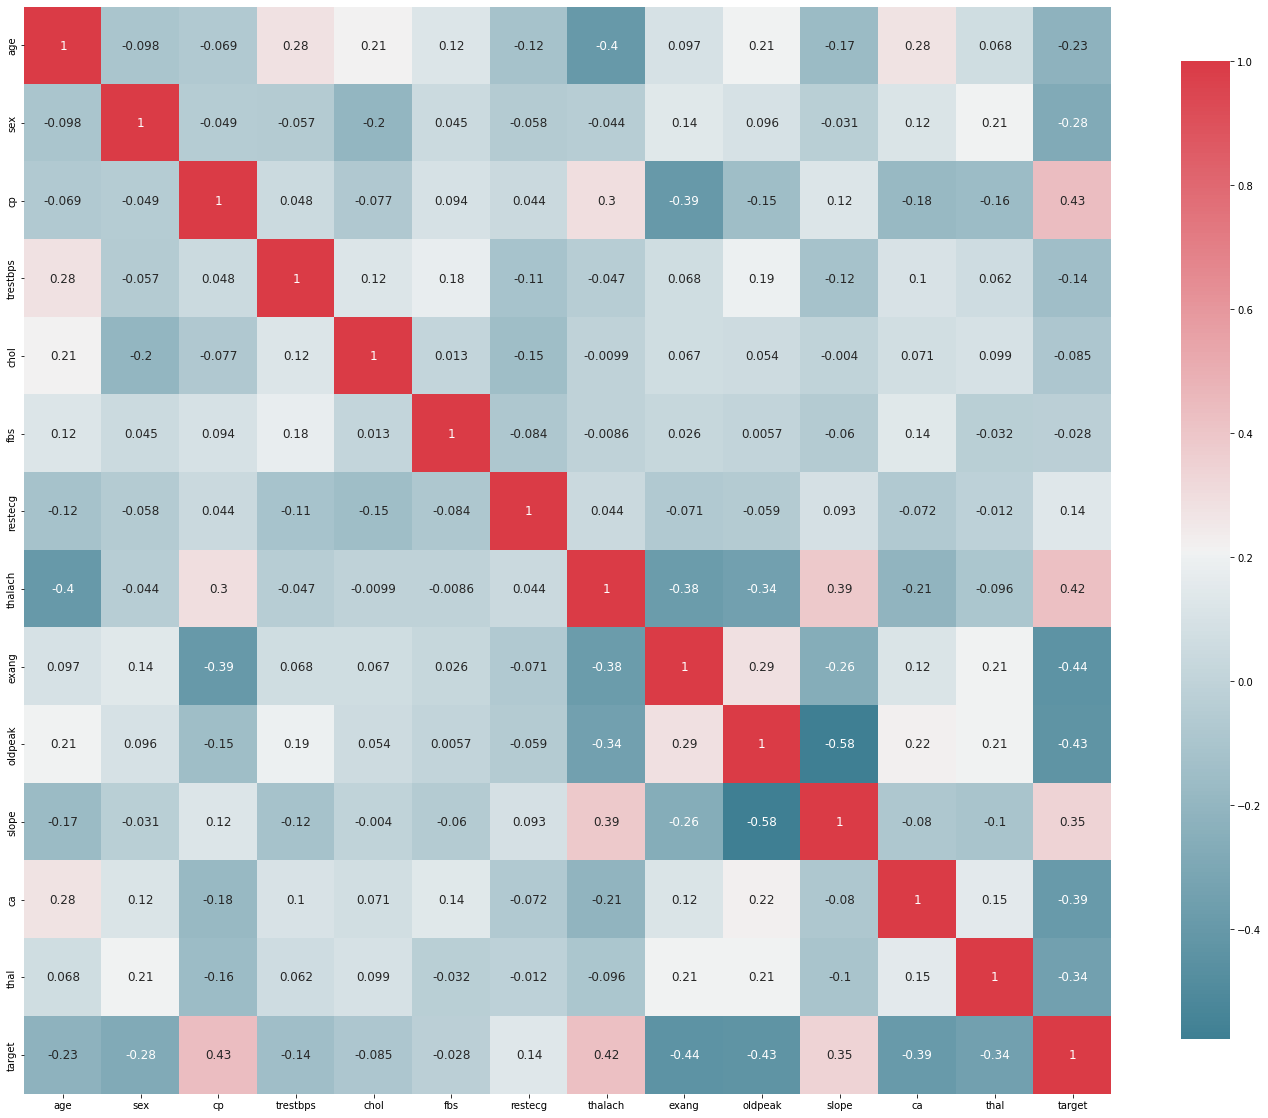

In [12]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.pyplot.subplots( figsize =( 25 , 20 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map( df )

In [16]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
X=df.drop(columns='target')
y=df['target']

In [21]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [28]:
LL = LogisticRegression(solver='liblinear',max_iter=200)
LL.fit(X_train,Y_train)
Y_pred_test = LL.predict(X_test)  

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_test)

0.955

In [31]:
FPR, TPR, cutoffs = metrics.roc_curve(Y_test,Y_pred_test,pos_label=1) 

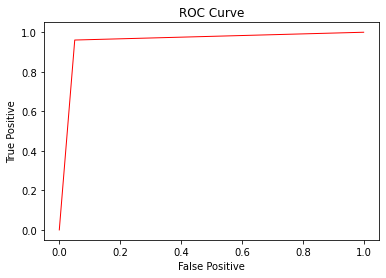

In [34]:
plt.pyplot.plot(FPR,TPR,c='red',linewidth=1.0)
plt.pyplot.xlabel('False Positive')
plt.pyplot.ylabel('True Positive')
plt.pyplot.title('ROC Curve')
plt.pyplot.show()

In [36]:
auc = metrics.roc_auc_score(Y_test,Y_pred_test)
print('AUC  = {}'.format(np.round(auc,3)))

AUC  = 0.955
